## Econ mini project
## Linaer regreesion:automobile sales data  
### John, Chow Chun Lam

This project will analyize the sales of the automobile by the income(Inc) and the unemployment rate(NRUR). it is expected that there is the positive relationship between the income and the sales and the negative relationship between the unemployment rate and the sales.

In [18]:
import pandas as pd
import sklearn as skl
import numpy as np 
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
regressor = LinearRegression()  # create object for the class

In [19]:
df = pd.read_excel('/Users/johnsc123/Downloads/econometric and forcasting/T6/ECON_A314F_T6_C5P6.xls',index_col='Period') # if it is time seies data, set index_col= 'time'
df

,Sales,Inc,NRUR,Seasonality
Period,,,,
1994-03-01,72962.0,218,8.4,Q1
1994-06-01,81921.0,237,8.2,Q2
1994-09-01,97729.0,263,8.4,Q3
1994-12-01,142161.0,293,8.4,Q4
1995-03-01,145592.0,318,8.1,Q1
1995-06-01,117129.0,359,7.7,Q2
1995-09-01,114159.0,404,7.5,Q3
1995-12-01,151402.0,436,7.2,Q4
1996-03-01,153907.0,475,6.9,Q1


it can be observed that the Sales data in 40 to 43 is missing.
we can ignore it first.

In [20]:
# just use the first 41 row of data to do our analysis.
testset=df.head(40) #.head(40) mean that we extract the first 40 rows data

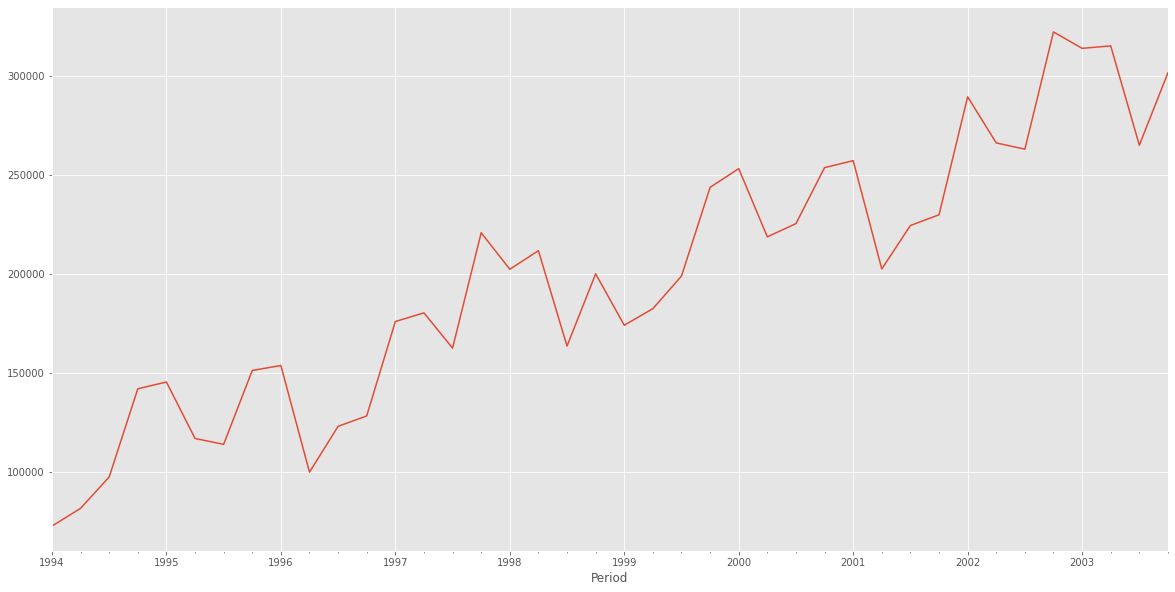

In [21]:
# plot the graph and oberserved the pattern.
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')
#if you forget set the time to be the index, use these 2 lines of code.
#testset['Period']=pd.to_datetime(testset['Period'])
#testset.set_index('Period', inplace=True) 
testset['Sales'].plot() 

there are the upward trend and seasonality in the sales data .

In [22]:
OLS = ols("Sales ~ Inc + NRUR", data = testset).fit() #OLS: before the '～'
print(OLS.summary())

OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     119.0
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           7.69e-17
Time:                        22:09:54   Log-Likelihood:                -460.85
No. Observations:                  40   AIC:                             927.7
Df Residuals:                      37   BIC:                             932.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.986e+04   2.43e+04      3.699      0.001    4.06e+04    1.39e+05
I

 85.81% of the variation in sales is explained by variations in income and the unemployment rate.

In [23]:

X = testset[['Inc', 'NRUR']] # I.V is the income and unemployment rate
Y = testset['Sales'] #D.V is the income and unemployment rate
regressor.fit(X, Y)  # perform linear regression
y_hat = regressor.predict(X)
x = np.asanyarray(testset[['Inc','NRUR']])
y = np.asanyarray(testset[['Sales']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(x, y))
testset = testset.assign(predicted_sale = y_hat)
testset

Residual sum of squares: 8252421401.06
Variance score: 0.87


,Sales,Inc,NRUR,Seasonality,predicted_sale
Period,,,,,
1994-03-01,72962.0,218,8.4,Q1,101110.914076
1994-06-01,81921.0,237,8.2,Q2,103792.449293
1994-09-01,97729.0,263,8.4,Q3,106597.476259
1994-12-01,142161.0,293,8.4,Q4,110255.184380
1995-03-01,145592.0,318,8.1,Q1,113850.754592
1995-06-01,117129.0,359,7.7,Q2,119579.595838
1995-09-01,114159.0,404,7.5,Q3,125431.144760
1995-12-01,151402.0,436,7.2,Q4,129880.180199
1996-03-01,153907.0,475,6.9,Q1,135182.680867


Text(0.5, 1.0, 'Sales data from 1994Q1 to 2003Q4')

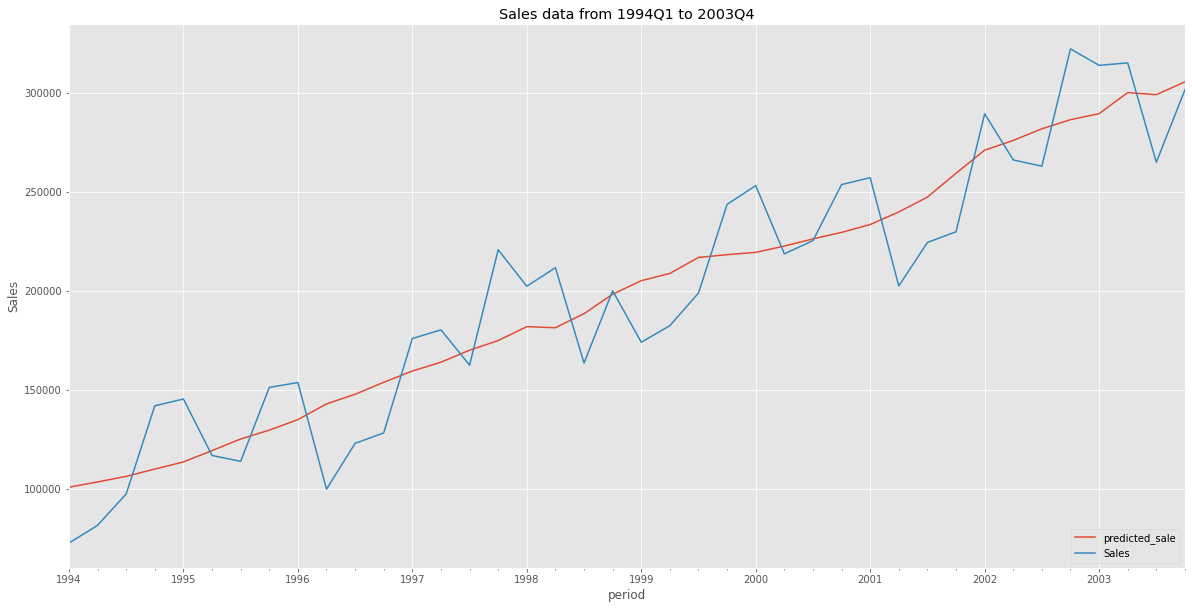

In [24]:
testset['predicted_sale'].plot()
testset['Sales'].plot()
plt.legend(loc=4)
plt.xlabel('period')
plt.ylabel('Sales')
plt.title('Sales data from 1994Q1 to 2003Q4')

Given the actual sales for the four quarters of 2008 were: Q1=334,271, Q2=328,982, Q3=317,921, and Q4=350,118. On the basis of this information, how well would you say the model worked? What is the root-mean-squared error (RMSE)?

In [25]:
# assign the value above to the dataframe
df.reset_index(inplace=True) # for the convience, reset the index from the period to the row number.
df.loc[[40],'Sales'] = 334271 #assign the sales in row 41
df.loc[[41],'Sales'] = 328982
df.loc[[42],'Sales'] = 317921
df.loc[[43],'Sales'] = 350118
df.set_index('Period', inplace=True)  #if you forget set the time be the index, use this code.
df.tail() # check the result wether

,Sales,Inc,NRUR,Seasonality
Period,,,,
2003-12-01,301479.0,1882,7.6,Q4
2004-03-01,334271.0,1928,7.6,Q1
2004-06-01,328982.0,1972,7.7,Q2
2004-09-01,317921.0,2017,7.5,Q3
2004-12-01,350118.0,2062,7.4,Q4


 we run the OLS again

In [26]:
simple = ols("Sales ~ Inc + NRUR", data = df).fit() #do the OLS again
print(simple.summary())

OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     180.7
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           4.66e-21
Time:                        22:09:56   Log-Likelihood:                -505.69
No. Observations:                  44   AIC:                             1017.
Df Residuals:                      41   BIC:                             1023.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.347e+04   2.32e+04      4.037      0.000    4.67e+04     1.4e+05
I

#### it is not surprised that the RMSE will also increase with the n increased. 

In [27]:
X1 = df[['Inc', 'NRUR']] 
y_hat1 = regressor.predict(X1) #use the data from 1994 to 2013 to predict the value of Sales in 2014 
df = df.assign(predicted_Sale = y_hat1) # append the predicted value to our dataframe 
df.head()

,Sales,Inc,NRUR,Seasonality,predicted_Sale
Period,,,,,
1994-03-01,72962.0,218,8.4,Q1,101110.914076
1994-06-01,81921.0,237,8.2,Q2,103792.449293
1994-09-01,97729.0,263,8.4,Q3,106597.476259
1994-12-01,142161.0,293,8.4,Q4,110255.184380
1995-03-01,145592.0,318,8.1,Q1,113850.754592


Text(0.5, 1.0, 'Sales data from 1994Q1 to 2004Q4')

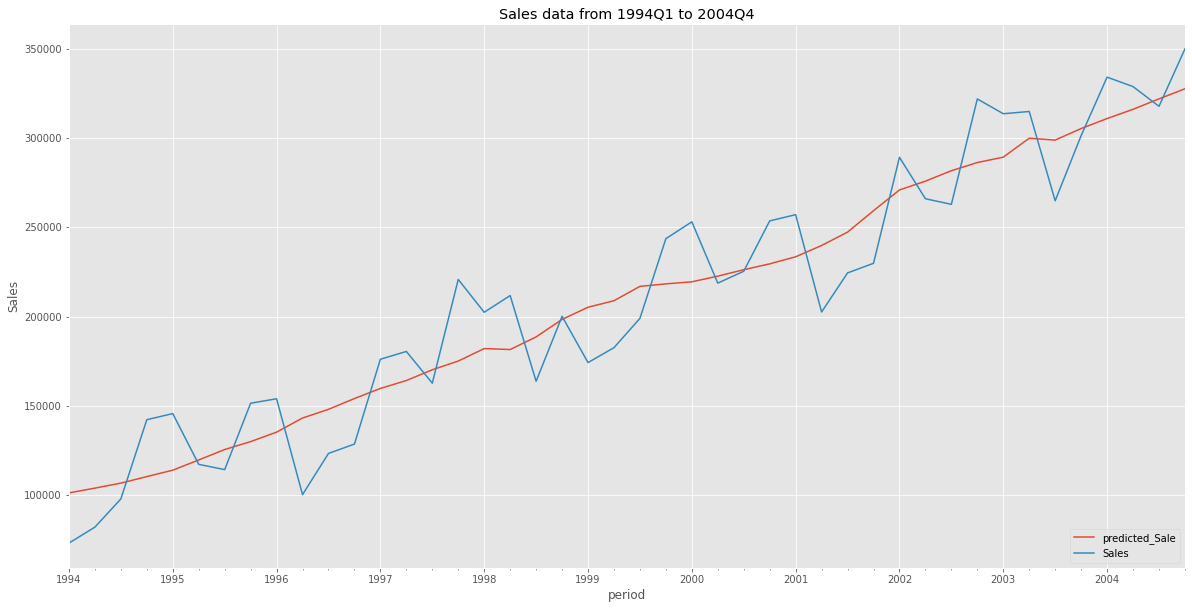

In [28]:
df['predicted_Sale'].plot()
df['Sales'].plot()
plt.legend(loc=4)
plt.xlabel('period')
plt.ylabel('Sales')
plt.title('Sales data from 1994Q1 to 2004Q4')

In [29]:
error=(df['Sales']-df['predicted_Sale'])
sm.stats.acorr_ljungbox(error, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,71.986006,8.604443e-08


In [30]:
Seasonality = pd.get_dummies(df['Seasonality']) # transfrom the seasonality to the dummy variable
df=df.merge(Seasonality,left_index=True, right_index=True) # merge Seasonality to the orginal dataframe
df.head()# check the result

,Sales,Inc,NRUR,Seasonality,predicted_Sale,Q1,Q2,Q3,Q4
Period,,,,,,,,,
1994-03-01,72962.0,218,8.4,Q1,101110.914076,1,0,0,0
1994-06-01,81921.0,237,8.2,Q2,103792.449293,0,1,0,0
1994-09-01,97729.0,263,8.4,Q3,106597.476259,0,0,1,0
1994-12-01,142161.0,293,8.4,Q4,110255.184380,0,0,0,1
1995-03-01,145592.0,318,8.1,Q1,113850.754592,1,0,0,0


In [31]:
simple = ols("Sales ~ Inc + NRUR+Q2+Q3+Q4", data = df).fit() # only n-1 of the dummy variable will be used.
print(simple.summary())

OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     98.30
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.13e-20
Time:                        22:09:58   Log-Likelihood:                -497.98
No. Observations:                  44   AIC:                             1008.
Df Residuals:                      38   BIC:                             1019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.062e+05    2.1e+04      5.068      0.000    6.38e+04    1.49e+05
I

#### After measuring the seasonal factor, the adj.RMSE incerase. That mean our model now can explain more data.

In [32]:
X1 = df[['Inc', 'NRUR','Q2','Q3','Q4']] 
Y1=df['Sales']
regressor.fit(X1, Y1)
y_hat2 = regressor.predict(X1) #use the data from 1994 to 2013 to predict the value of Sales in 2014 
df = df.assign(new_predicted_Sale = y_hat2) # append the predicted value to our dataframe 
df.head()

,Sales,Inc,NRUR,Seasonality,predicted_Sale,Q1,Q2,Q3,Q4,new_predicted_Sale
Period,,,,,,,,,,
1994-03-01,72962.0,218,8.4,Q1,101110.914076,1,0,0,0,111308.172094
1994-06-01,81921.0,237,8.2,Q2,103792.449293,0,1,0,0,93928.534166
1994-09-01,97729.0,263,8.4,Q3,106597.476259,0,0,1,0,86884.785555
1994-12-01,142161.0,293,8.4,Q4,110255.184380,0,0,0,1,120056.327519
1995-03-01,145592.0,318,8.1,Q1,113850.754592,1,0,0,0,124700.492246


Text(0.5, 1.0, 'Sales data from 1994Q1 to 2004Q4(seasonal)')

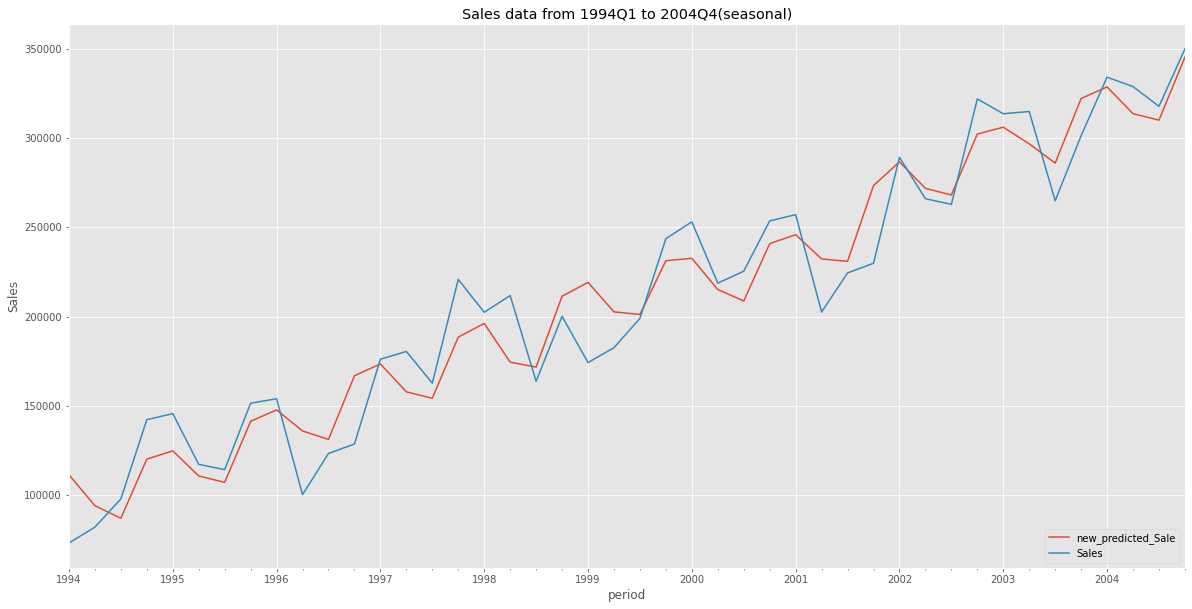

In [33]:
df['new_predicted_Sale'].plot()
df['Sales'].plot()
plt.legend(loc=4)
plt.xlabel('period')
plt.ylabel('Sales')
plt.title('Sales data from 1994Q1 to 2004Q4(seasonal)')

After measuring the seasonal dummy variables , the new modeal have larger ability to capture the real data 

In [34]:
error=(df['Sales']-df['new_predicted_Sale'])
sm.stats.acorr_ljungbox(error, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,102.105271,5.280304e-13


end